<a href="https://colab.research.google.com/github/Pranav-sync/Pranav-sync/blob/main/YHills_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2
 **Iris Flower Classification
Project Idea:**The Iris Dataset can be downloaded from the UCI ML Repository—
Download Iris Flowers Dataset. The goal of this data science project for
beginners is to classify the flowers into three species—Virginia, setosa, or
versicolor—based on the length and width of the petals and sepals. By
implementing advanced algorithms, you can also add this project to your deep
learning projects portfolio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
sample=pd.read_csv('Iris.csv')
sample

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#taking out the info about the dataset
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
sample.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# checking the duplicated avlues present in dataset
dup=sample.duplicated().sum()
print(f"Duplicated values in dataset is {dup}")

Duplicated values in dataset is 0


In [ ]:
sample.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
sample.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
sample.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
for i in sample.columns.tolist():
  print("No. of unique values in",i,"is",sample[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [ ]:
# we will drop the the first columns as it is not needed
data=sample.drop('Id',axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


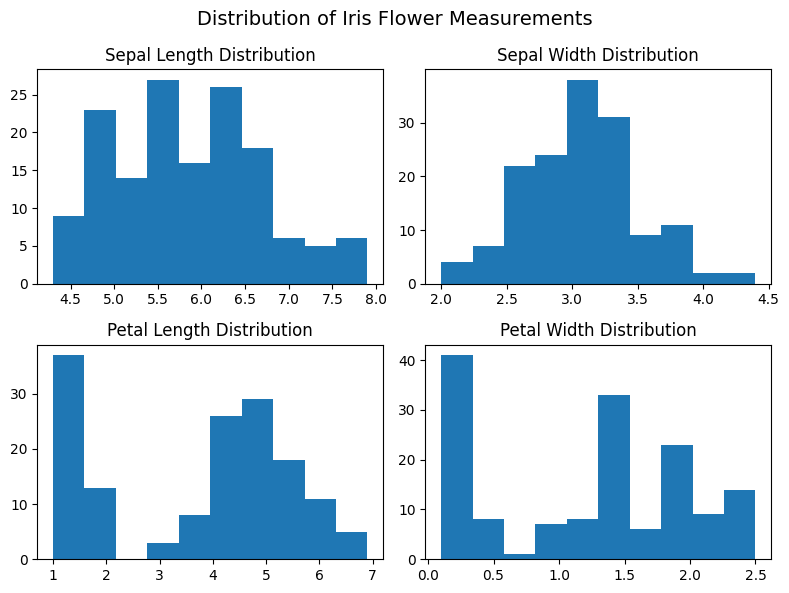

In [ ]:
#visualisation
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)


plt.subplot(2, 2, 1)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')


plt.tight_layout()
plt.show()

In [ ]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

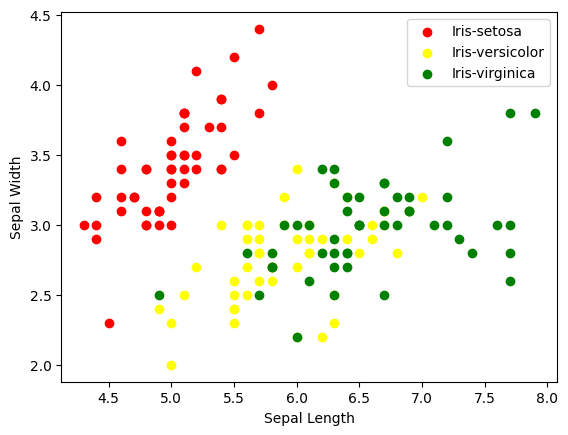

In [ ]:
#sepal length and sepal width
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()

plt.show()

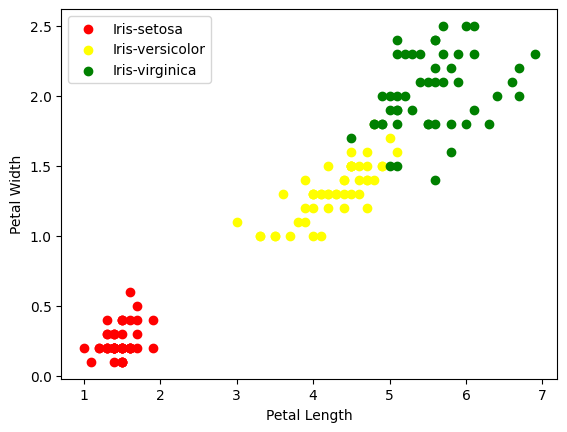

In [ ]:
#petal length and petal width
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.legend()

plt.show()

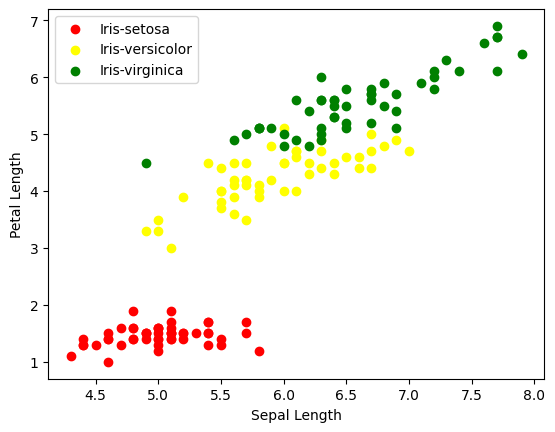

In [ ]:
# petal length and sepal length
for i in range(3):

    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.legend()

plt.show()

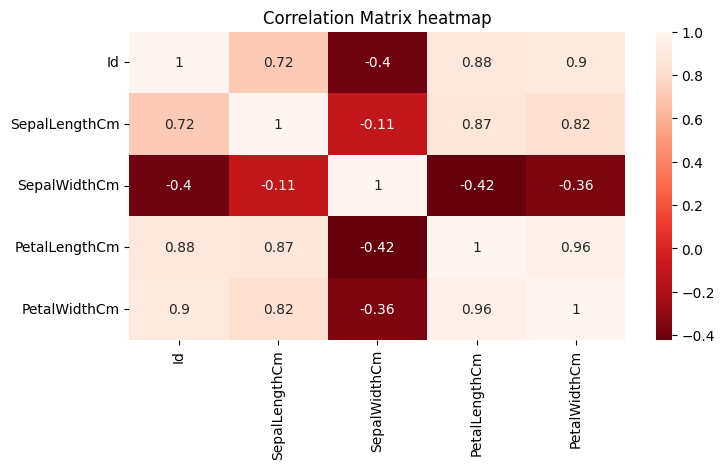

In [ ]:

corr_matrix = sample.drop('Species', axis=1).corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

plt.title('Correlation Matrix heatmap')

plt.show()

APPLYING LABEL ENCODER ON THE SPECIES COLUMN

In [ ]:
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
unique_species=data['Species'].unique()
unique_species

array([0, 1, 2])

In [ ]:
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
y_train.value_counts()

Species
2    42
1    42
0    36
Name: count, dtype: int64

In [ ]:
def evaluate_model(model, x_train, x_test, y_train, y_test):

    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [ ]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])



Confusion Matrix:


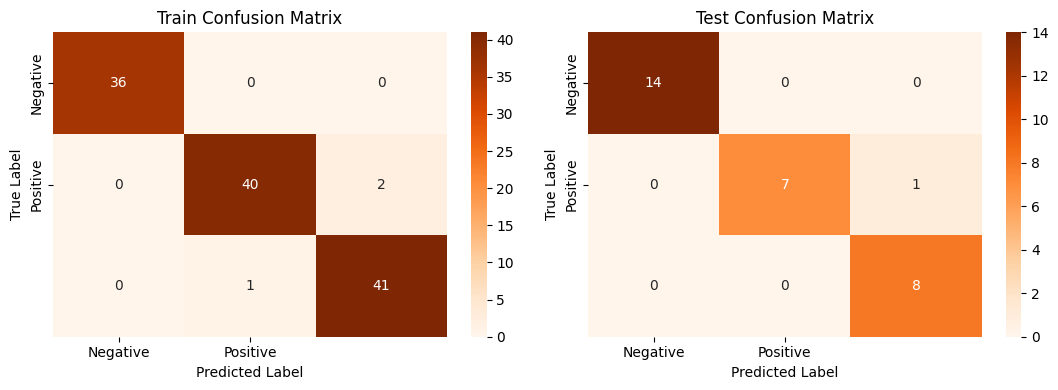


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |    36     |
| 1            |    0.97561  | 0.952381 |   0.963855 |    42     |
| 2            |    0.953488 | 0.97619  |   0.964706 |    42     |
| accuracy     |    0.975    | 0.975    |   0.975    |     0.975 |
| macro avg    |    0.976366 | 0.97619  |   0.976187 |   120     |
| weighted avg |    0.975184 | 0.975    |   0.974996 |   120     |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    1        | 0.875    |   0.933333 |  8        |
| 2            |    0.888889 | 1        |   0.941176 |  8        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.966667 |
| m

In [ ]:
#Logistic Regression
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_score=evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [ ]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.975184
Precision Test,0.970370
Recall Train,0.975000
Recall Test,0.966667
Accuracy Train,0.975000
Accuracy Test,0.966667
F1 macro Train,0.974996
F1 macro Test,0.966536


In [ ]:
score

,Logistic regression
Precision Train,0.975184
Precision Test,0.970370
Recall Train,0.975000
Recall Test,0.966667
Accuracy Train,0.975000
Accuracy Test,0.966667
F1 macro Train,0.974996
F1 macro Test,0.966536


In [ ]:
#applying the second machine learning model
dt_model = DecisionTreeClassifier(random_state=20)


Confusion Matrix:


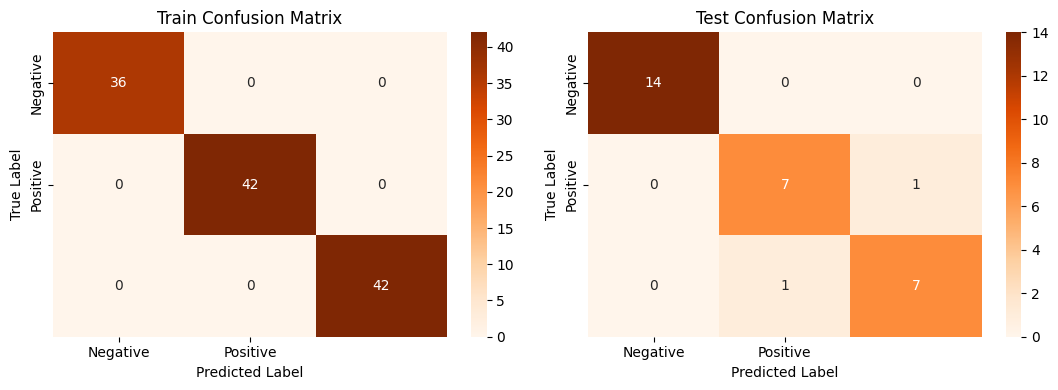


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        42 |
| 2            |           1 |        1 |          1 |        42 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       120 |
| weighted avg |           1 |        1 |          1 |       120 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.875    | 0.875    |   0.875    |  8        |
| 2            |    0.875    | 0.875    |   0.875    |  8        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [ ]:
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [ ]:
score['Decision Tree'] = dt_score
score

,Logistic regression,Decision Tree
Precision Train,0.975184,1.000000
Precision Test,0.970370,0.933333
Recall Train,0.975000,1.000000
Recall Test,0.966667,0.933333
Accuracy Train,0.975000,1.000000
Accuracy Test,0.966667,0.933333
F1 macro Train,0.974996,1.000000
F1 macro Test,0.966536,0.933333


In [ ]:
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

model = DecisionTreeClassifier()

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

grid_search = GridSearchCV(model, grid, cv=rskf)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 11, 'min_samples_split': 3}



Confusion Matrix:


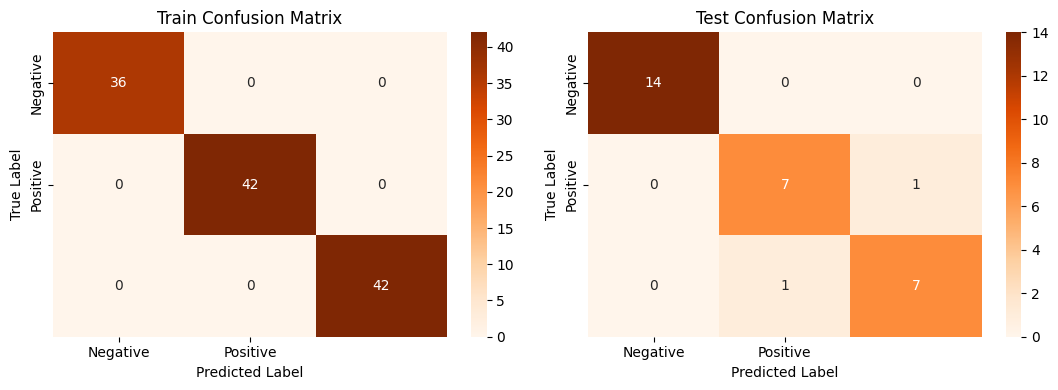


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        42 |
| 2            |           1 |        1 |          1 |        42 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       120 |
| weighted avg |           1 |        1 |          1 |       120 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.875    | 0.875    |   0.875    |  8        |
| 2            |    0.875    | 0.875    |   0.875    |  8        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [ ]:
dt2_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [ ]:
score['Decision Tree tuned'] = dt2_score
score

,Logistic regression,Decision Tree,Decision Tree tuned
Precision Train,0.975184,1.000000,1.000000
Precision Test,0.970370,0.933333,0.933333
Recall Train,0.975000,1.000000,1.000000
Recall Test,0.966667,0.933333,0.933333
Accuracy Train,0.975000,1.000000,1.000000
Accuracy Test,0.966667,0.933333,0.933333
F1 macro Train,0.974996,1.000000,1.000000
F1 macro Test,0.966536,0.933333,0.933333


In [ ]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)


Confusion Matrix:


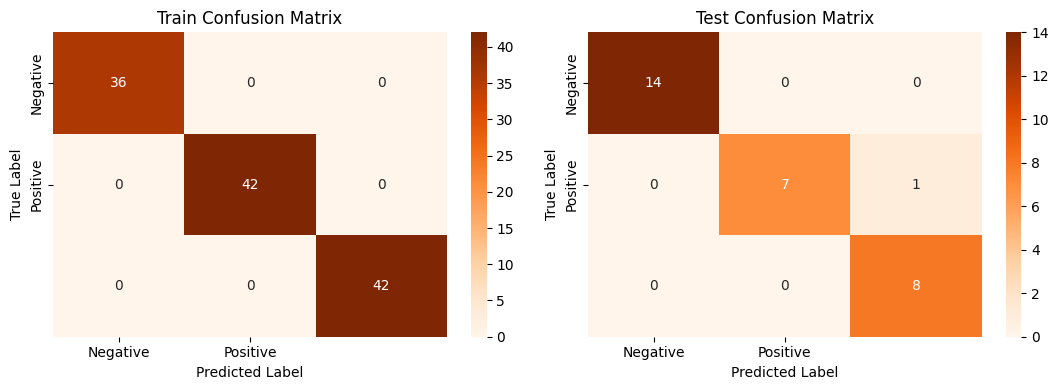


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        42 |
| 2            |           1 |        1 |          1 |        42 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       120 |
| weighted avg |           1 |        1 |          1 |       120 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    1        | 0.875    |   0.933333 |  8        |
| 2            |    0.888889 | 1        |   0.941176 |  8        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.966667 |
| m

In [ ]:
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [ ]:
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

rf = RandomForestClassifier(random_state=0)

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 15}


In [ ]:
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


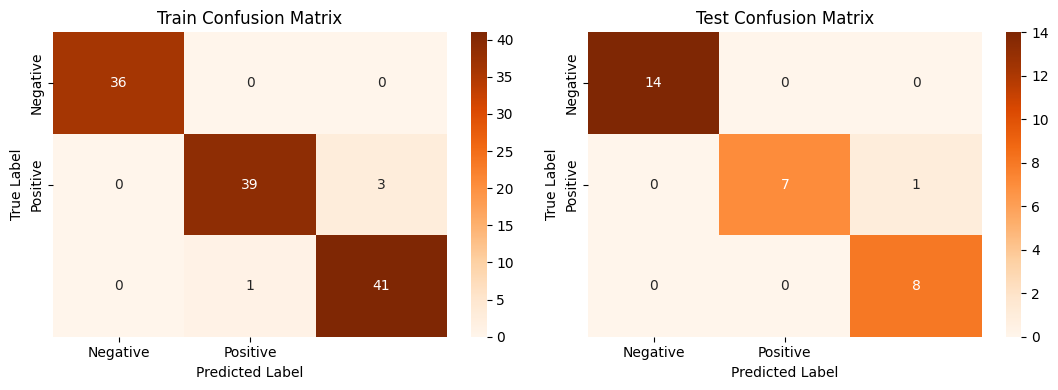


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    0.975    | 0.928571 |   0.95122  |  42        |
| 2            |    0.931818 | 0.97619  |   0.953488 |  42        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |   0.966667 |
| macro avg    |    0.968939 | 0.968254 |   0.968236 | 120        |
| weighted avg |    0.967386 | 0.966667 |   0.966648 | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    1        | 0.875    |   0.933333 |  8        |
| 2            |    0.888889 | 1        |   0.941176 |  8        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.9666

In [ ]:
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Random Forest tuned'] = rf2_score
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest tuned
Precision Train,0.975184,1.000000,1.000000,0.967386
Precision Test,0.970370,0.933333,0.933333,0.970370
Recall Train,0.975000,1.000000,1.000000,0.966667
Recall Test,0.966667,0.933333,0.933333,0.966667
Accuracy Train,0.975000,1.000000,1.000000,0.966667
Accuracy Test,0.966667,0.933333,0.933333,0.966667
F1 macro Train,0.974996,1.000000,1.000000,0.966648
F1 macro Test,0.966536,0.933333,0.933333,0.966536


In [ ]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)


Confusion Matrix:


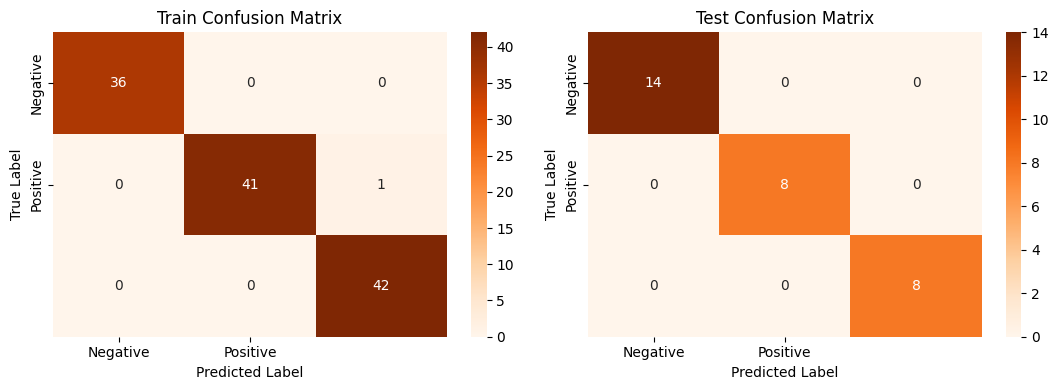


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.97619  |   0.987952 |  42        |
| 2            |    0.976744 | 1        |   0.988235 |  42        |
| accuracy     |    0.991667 | 0.991667 |   0.991667 |   0.991667 |
| macro avg    |    0.992248 | 0.992063 |   0.992062 | 120        |
| weighted avg |    0.99186  | 0.991667 |   0.991665 | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        14 |
| 1            |           1 |        1 |          1 |         8 |
| 2            |           1 |        1 |          1 |         8 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [ ]:
score['SVM'] = svm_score
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest tuned,SVM
Precision Train,0.975184,1.000000,1.000000,0.967386,0.991860
Precision Test,0.970370,0.933333,0.933333,0.970370,1.000000
Recall Train,0.975000,1.000000,1.000000,0.966667,0.991667
Recall Test,0.966667,0.933333,0.933333,0.966667,1.000000
Accuracy Train,0.975000,1.000000,1.000000,0.966667,0.991667
Accuracy Test,0.966667,0.933333,0.933333,0.966667,1.000000
F1 macro Train,0.974996,1.000000,1.000000,0.966648,0.991665
F1 macro Test,0.966536,0.933333,0.933333,0.966536,1.000000


In [ ]:
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}


svm = SVC(random_state=0, probability=True)

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': 5, 'C': 0.4}


In [ ]:
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


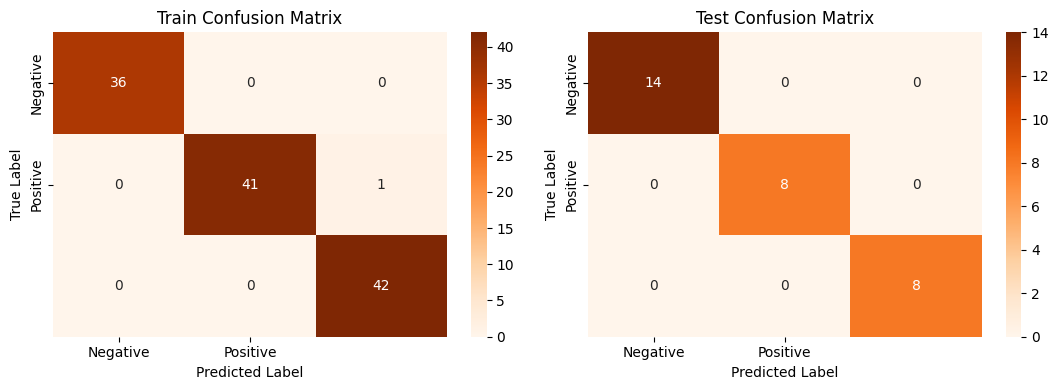


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.97619  |   0.987952 |  42        |
| 2            |    0.976744 | 1        |   0.988235 |  42        |
| accuracy     |    0.991667 | 0.991667 |   0.991667 |   0.991667 |
| macro avg    |    0.992248 | 0.992063 |   0.992062 | 120        |
| weighted avg |    0.99186  | 0.991667 |   0.991665 | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        14 |
| 1            |           1 |        1 |          1 |         8 |
| 2            |           1 |        1 |          1 |         8 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['SVM tuned'] = svm2_score
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest tuned,SVM,SVM tuned
Precision Train,0.975184,1.000000,1.000000,0.967386,0.991860,0.991860
Precision Test,0.970370,0.933333,0.933333,0.970370,1.000000,1.000000
Recall Train,0.975000,1.000000,1.000000,0.966667,0.991667,0.991667
Recall Test,0.966667,0.933333,0.933333,0.966667,1.000000,1.000000
Accuracy Train,0.975000,1.000000,1.000000,0.966667,0.991667,0.991667
Accuracy Test,0.966667,0.933333,0.933333,0.966667,1.000000,1.000000
F1 macro Train,0.974996,1.000000,1.000000,0.966648,0.991665,0.991665
F1 macro Test,0.966536,0.933333,0.933333,0.966536,1.000000,1.000000


In [ ]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()


Confusion Matrix:


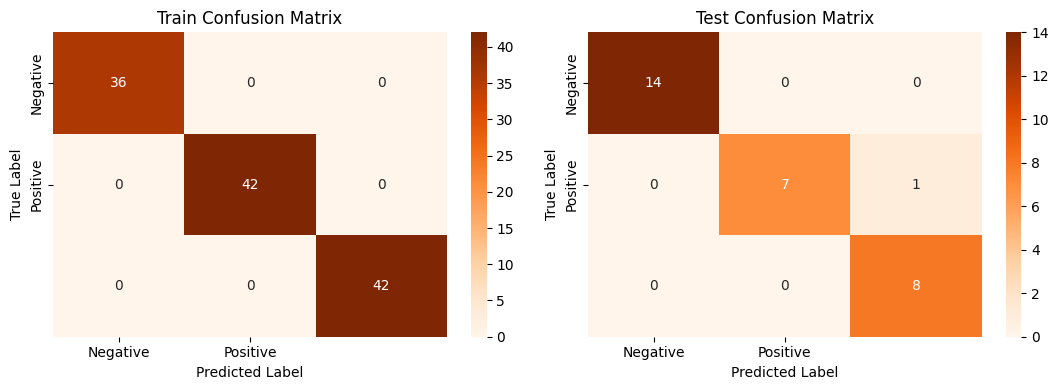


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        42 |
| 2            |           1 |        1 |          1 |        42 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       120 |
| weighted avg |           1 |        1 |          1 |       120 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    1        | 0.875    |   0.933333 |  8        |
| 2            |    0.888889 | 1        |   0.941176 |  8        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.966667 |
| m

In [ ]:
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [ ]:
score['XGB'] = xgb_score
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.975184,1.000000,1.000000,0.967386,0.991860,0.991860,1.000000
Precision Test,0.970370,0.933333,0.933333,0.970370,1.000000,1.000000,0.970370
Recall Train,0.975000,1.000000,1.000000,0.966667,0.991667,0.991667,1.000000
Recall Test,0.966667,0.933333,0.933333,0.966667,1.000000,1.000000,0.966667
Accuracy Train,0.975000,1.000000,1.000000,0.966667,0.991667,0.991667,1.000000
Accuracy Test,0.966667,0.933333,0.933333,0.966667,1.000000,1.000000,0.966667
F1 macro Train,0.974996,1.000000,1.000000,0.966648,0.991665,0.991665,1.000000
F1 macro Test,0.966536,0.933333,0.933333,0.966536,1.000000,1.000000,0.966536


In [ ]:
nn_model = MLPClassifier(random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Confusion Matrix:


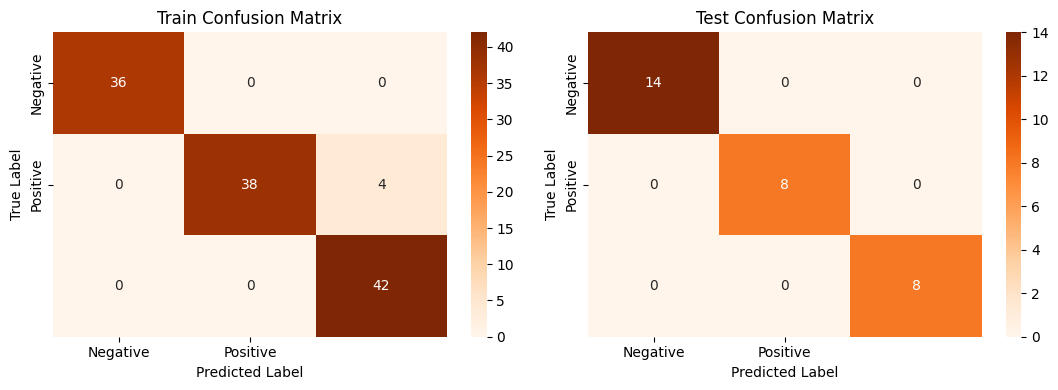


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.904762 |   0.95     |  42        |
| 2            |    0.913043 | 1        |   0.954545 |  42        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |   0.966667 |
| macro avg    |    0.971014 | 0.968254 |   0.968182 | 120        |
| weighted avg |    0.969565 | 0.966667 |   0.966591 | 120        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        14 |
| 1            |           1 |        1 |          1 |         8 |
| 2            |           1 |        1 |          1 |         8 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [ ]:
score['Neural Network'] = neural_score
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest tuned,SVM,SVM tuned,XGB,Neural Network
Precision Train,0.975184,1.000000,1.000000,0.967386,0.991860,0.991860,1.000000,0.969565
Precision Test,0.970370,0.933333,0.933333,0.970370,1.000000,1.000000,0.970370,1.000000
Recall Train,0.975000,1.000000,1.000000,0.966667,0.991667,0.991667,1.000000,0.966667
Recall Test,0.966667,0.933333,0.933333,0.966667,1.000000,1.000000,0.966667,1.000000
Accuracy Train,0.975000,1.000000,1.000000,0.966667,0.991667,0.991667,1.000000,0.966667
Accuracy Test,0.966667,0.933333,0.933333,0.966667,1.000000,1.000000,0.966667,1.000000
F1 macro Train,0.974996,1.000000,1.000000,0.966648,0.991665,0.991665,1.000000,0.966591
F1 macro Test,0.966536,0.933333,0.933333,0.966536,1.000000,1.000000,0.966536,1.000000


In [ ]:
print(score.to_markdown())

|                 |   Logistic regression |   Decision Tree |   Decision Tree tuned |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   Neural Network |
|:----------------|----------------------:|----------------:|----------------------:|----------------------:|---------:|------------:|---------:|-----------------:|
| Precision Train |              0.975184 |        1        |              1        |              0.967386 | 0.99186  |    0.99186  | 1        |         0.969565 |
| Precision Test  |              0.97037  |        0.933333 |              0.933333 |              0.97037  | 1        |    1        | 0.97037  |         1        |
| Recall Train    |              0.975    |        1        |              1        |              0.966667 | 0.991667 |    0.991667 | 1        |         0.966667 |
| Recall Test     |              0.966667 |        0.933333 |              0.933333 |              0.966667 | 1        |    1        | 0.966667 |         1        |
| Accuracy

In [ ]:
#Selection of the best model
score_t = score.transpose()
remove_models = score_t[score_t['Recall Train']>=0.98].index

adj = score_t.drop(remove_models)
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression,0.975184,0.97037,0.975000,0.966667,0.975000,0.966667,0.974996,0.966536
Random Forest tuned,0.967386,0.97037,0.966667,0.966667,0.966667,0.966667,0.966648,0.966536
Neural Network,0.969565,1.00000,0.966667,1.000000,0.966667,1.000000,0.966591,1.000000


In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [ ]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Neural Network - 1.0
Recall: Neural Network - 1.0
Accuracy: Neural Network - 1.0
F1 macro: Neural Network - 1.0


In [ ]:
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Logistic regression    |       0.975    |      0.966667 |
| Random Forest tuned    |       0.966667 |      0.966667 |
| Neural Network         |       0.966667 |      1        |


In [ ]:
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [ ]:
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
